In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('DS2_C5_S3_HR_Data_Practice.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [4]:
df.shape

(14999, 10)

In [5]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

# Task 1

# Data Exploration and Visualization.

# a.Visualize the impact of salary on employee retention.

<Figure size 1000x400 with 0 Axes>

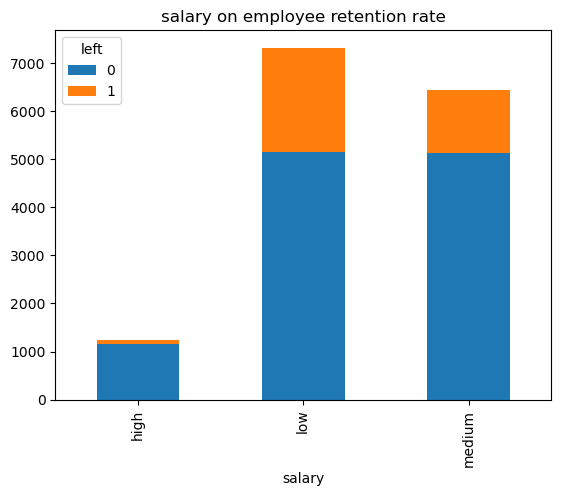

In [8]:
plt.figure(figsize=(10,4))
pd.crosstab(df['salary'],df['left']).plot(kind='bar',stacked=True)
plt.title('salary on employee retention rate');


# b.Find the Department-Wise employees retention rate.

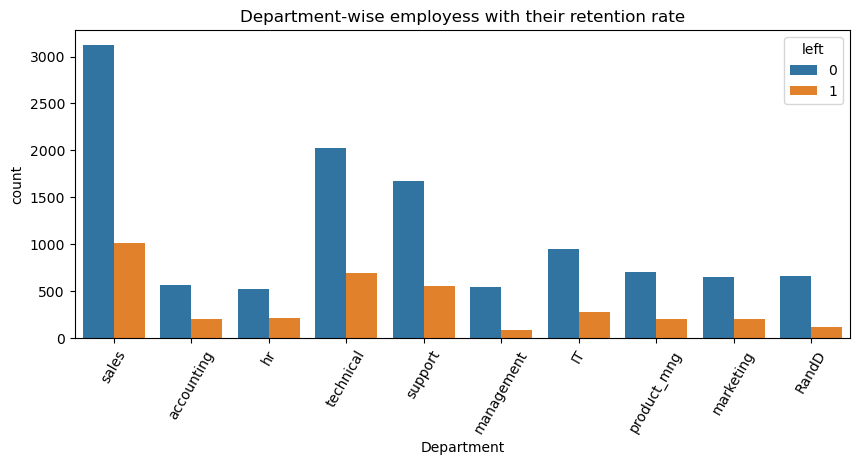

In [10]:
plt.figure(figsize=(10,4))
sb.countplot(data=df,x='Department',hue='left',dodge=True)
plt.title('Department-wise employess with their retention rate')
plt.xticks(rotation=60);

# Task 2

# Data Preprocessing

# a. Access the missing value.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [12]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

# b.Detect correlations in the dataset.

In [13]:
df.corr().T

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


<AxesSubplot:>

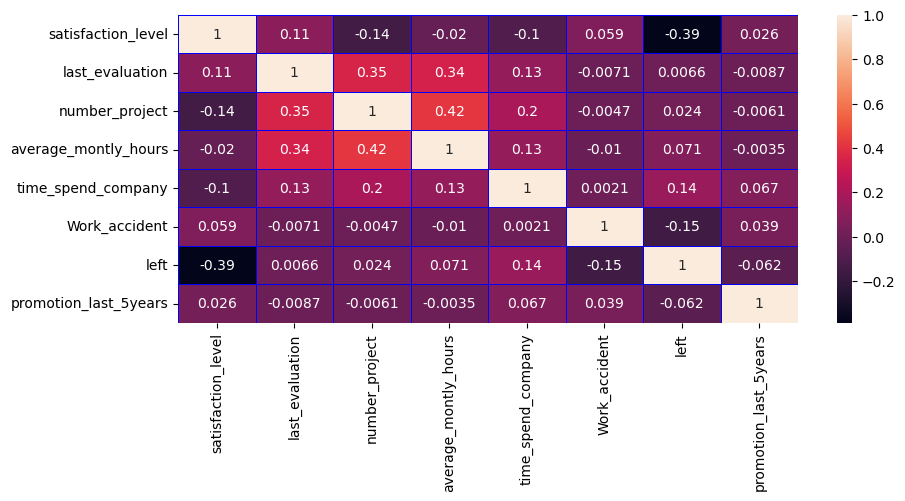

In [14]:
plt.figure(figsize=(10,4))
sb.heatmap(df.corr(),annot=True,linecolor='b',linewidth=.4)

# c.Data prepartion: Salary and department have all text data. Convert them to numbers.

In [15]:
from sklearn.preprocessing import LabelEncoder
df['Department']=LabelEncoder().fit_transform(df['Department'])
df['salary']=LabelEncoder().fit_transform(df['salary'])

In [16]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
scale_df=pd.DataFrame(scale.fit_transform(df),columns=df.columns)
scale_df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.318681,0.265625,0.0,0.285047,0.125,0.0,1.0,0.0,0.777778,0.5
1,0.780220,0.781250,0.6,0.775701,0.500,0.0,1.0,0.0,0.777778,1.0
2,0.021978,0.812500,1.0,0.822430,0.250,0.0,1.0,0.0,0.777778,1.0
3,0.692308,0.796875,0.6,0.593458,0.375,0.0,1.0,0.0,0.777778,0.5
4,0.307692,0.250000,0.0,0.294393,0.125,0.0,1.0,0.0,0.777778,0.5
...,...,...,...,...,...,...,...,...,...,...
14994,0.340659,0.328125,0.0,0.257009,0.125,0.0,1.0,0.0,0.888889,0.5
14995,0.307692,0.187500,0.0,0.299065,0.125,0.0,1.0,0.0,0.888889,0.5
14996,0.307692,0.265625,0.0,0.219626,0.125,0.0,1.0,0.0,0.888889,0.5
14997,0.021978,0.937500,0.8,0.859813,0.250,0.0,1.0,0.0,0.888889,0.5


# Task 4

# Modelling-Logistic Regression.

# a. Split the data into train and test sets.

In [17]:
x=df.drop(columns='left',axis=1)
y=df['left']

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=100)

# b.Logistic regression: Train the model and predict the outcomes for test data.

In [27]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
model.score(x_train,y_train)


0.7689303743213639

In [33]:
Y_train=model.predict(x_train)
Y_train

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [30]:
print('Intercept',model.intercept_)
print('Slope',model.coef_)

Intercept [-0.0466279]
Slope [[-4.08794374  0.74706968 -0.31989194  0.00485508  0.22371152 -1.47458173
  -0.9993612   0.03901274 -0.02463822]]


In [31]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# c.Test for the accurracy of the model on train data.

In [34]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,Y_train))

0.7689303743213639


# c.Test for the accurracy of the model on test data.

In [21]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.7635555555555555


# Task 4

# Evaluation: Confusion matrix and ROC-AUC.

# a.Confusion matrix: Calculate acccuracy. Recall,F1-score and precision.

In [23]:
df=pd.DataFrame(x_train.columns)
df.columns=['Features']
df['coef']=model.coef_[0]

In [24]:
df

,Features,coef
0,satisfaction_level,-4.087944
1,last_evaluation,0.747070
2,number_project,-0.319892
3,average_montly_hours,0.004855
4,time_spend_company,0.223712
5,Work_accident,-1.474582
6,promotion_last_5years,-0.999361
7,Department,0.039013
8,salary,-0.024638


In [25]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86      3401
           1       0.53      0.27      0.35      1099

    accuracy                           0.76      4500
   macro avg       0.66      0.60      0.60      4500
weighted avg       0.73      0.76      0.73      4500



# b.Calculate ROC,AUC score.

In [27]:
from sklearn.metrics import roc_auc_score


In [30]:
roc=roc_auc_score(y_test,model.predict_proba(x_test)[:,1])
roc

0.81748450049081

In [32]:
from sklearn.metrics import roc_curve

Text(0, 0.5, 'tpr')

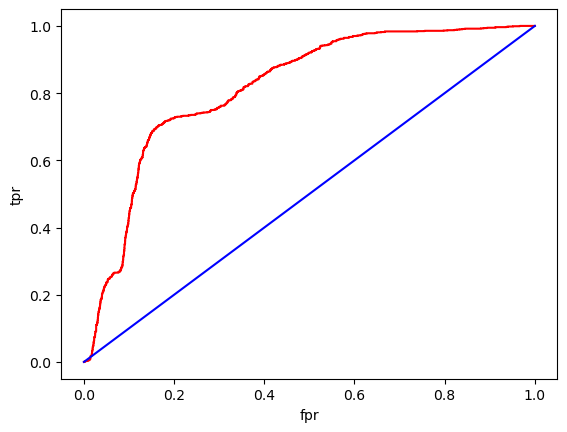

In [34]:
probability_value=model.predict_proba(x_test)[:,1]
fpr,tpr,threshode=roc_curve(y_test,probability_value)
plt.plot(fpr,tpr,color='red',label='roc')
plt.plot([0,1],[0,1],color='blue',linestyle='-')
plt.xlabel('fpr')
plt.ylabel('tpr')

# Visualization for categorical data.

In [14]:
cat=[]
num=[]
for i in df.columns:
    if df[i].nunique()<10: 
        cat.append(i)
    else:
        num.append(i)        

In [15]:
cat

['number_project',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'salary']

In [16]:
num

['satisfaction_level', 'last_evaluation', 'average_montly_hours', 'Department']

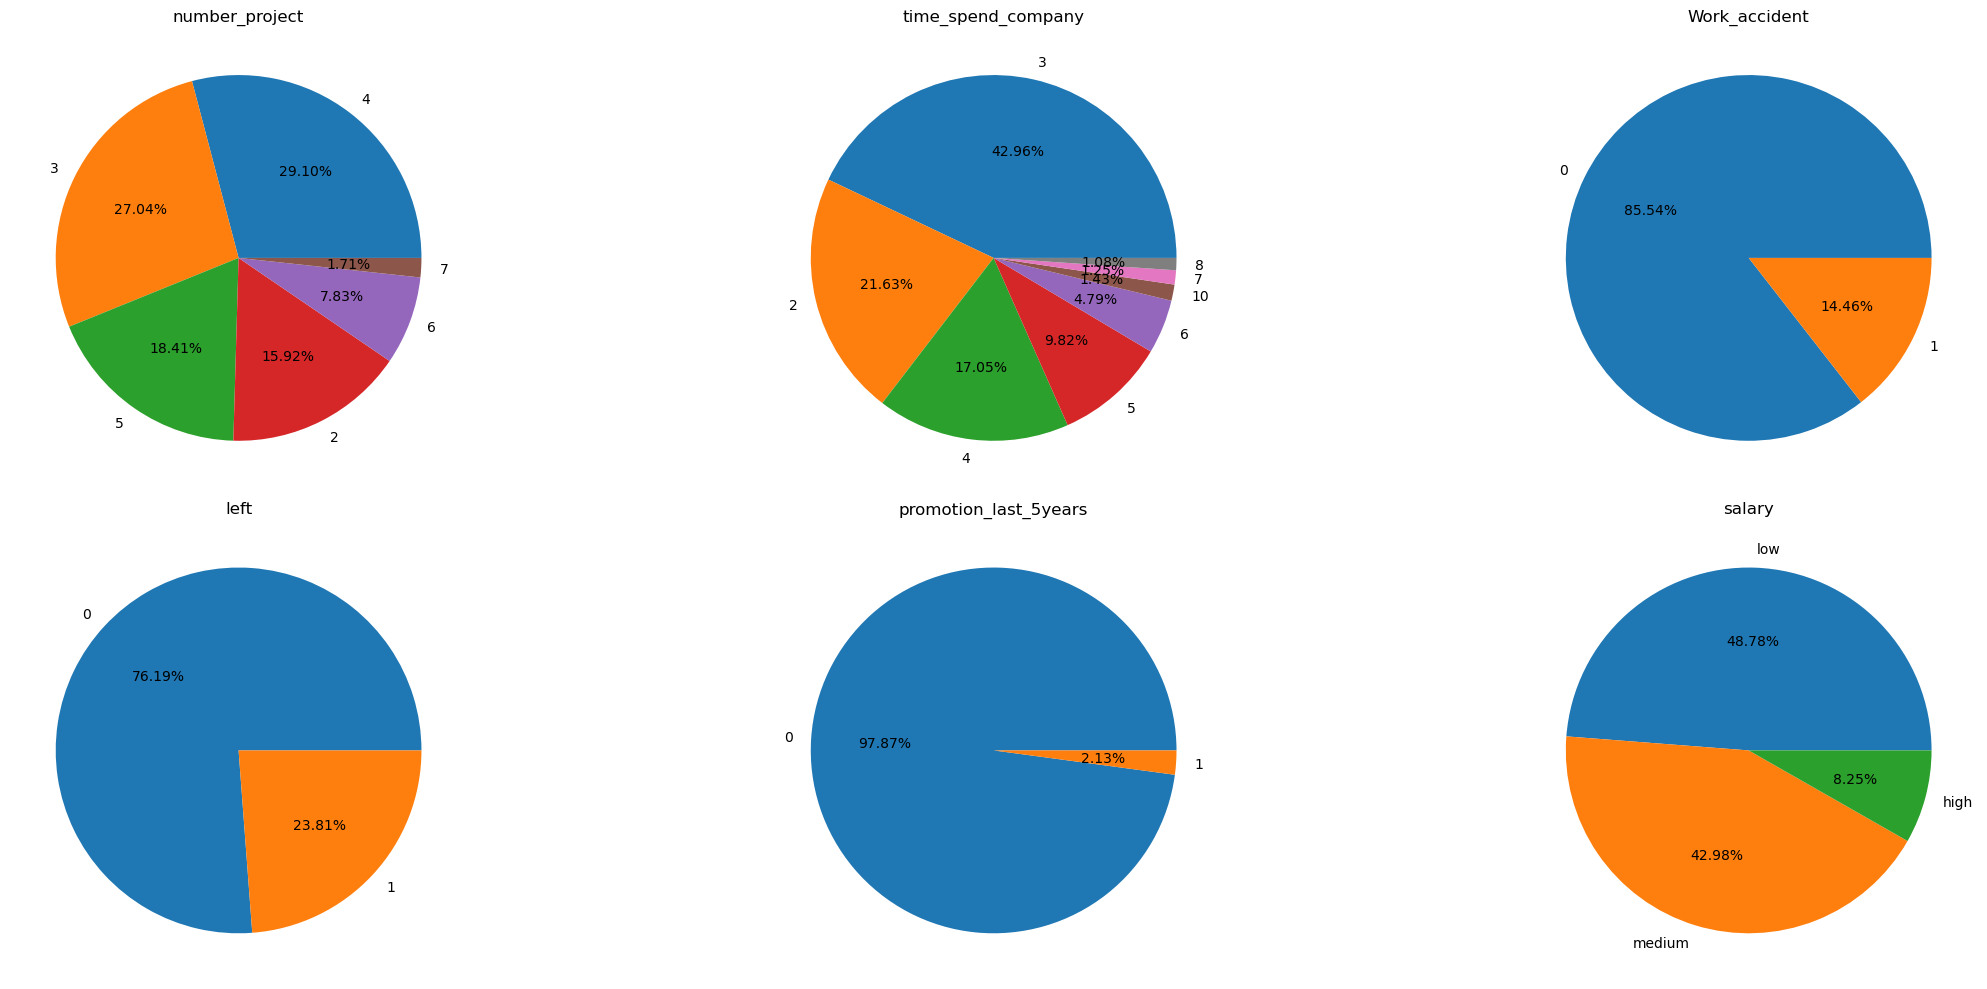

In [24]:
cat_col=cat
num_cols=3
num_rows=int(len(cat_col)/num_cols)
fig,axs=plt.subplots(num_rows,num_cols,tight_layout=True,figsize=(25,10))
for col,ax in zip(cat_col,axs.flatten()[:len(cat_col)]):
    ax.pie(labels=df[col].value_counts().index,x=df[col].value_counts().values,autopct='%.2f%%')
    ax.set_title(col)

# Visualization for categorical data.

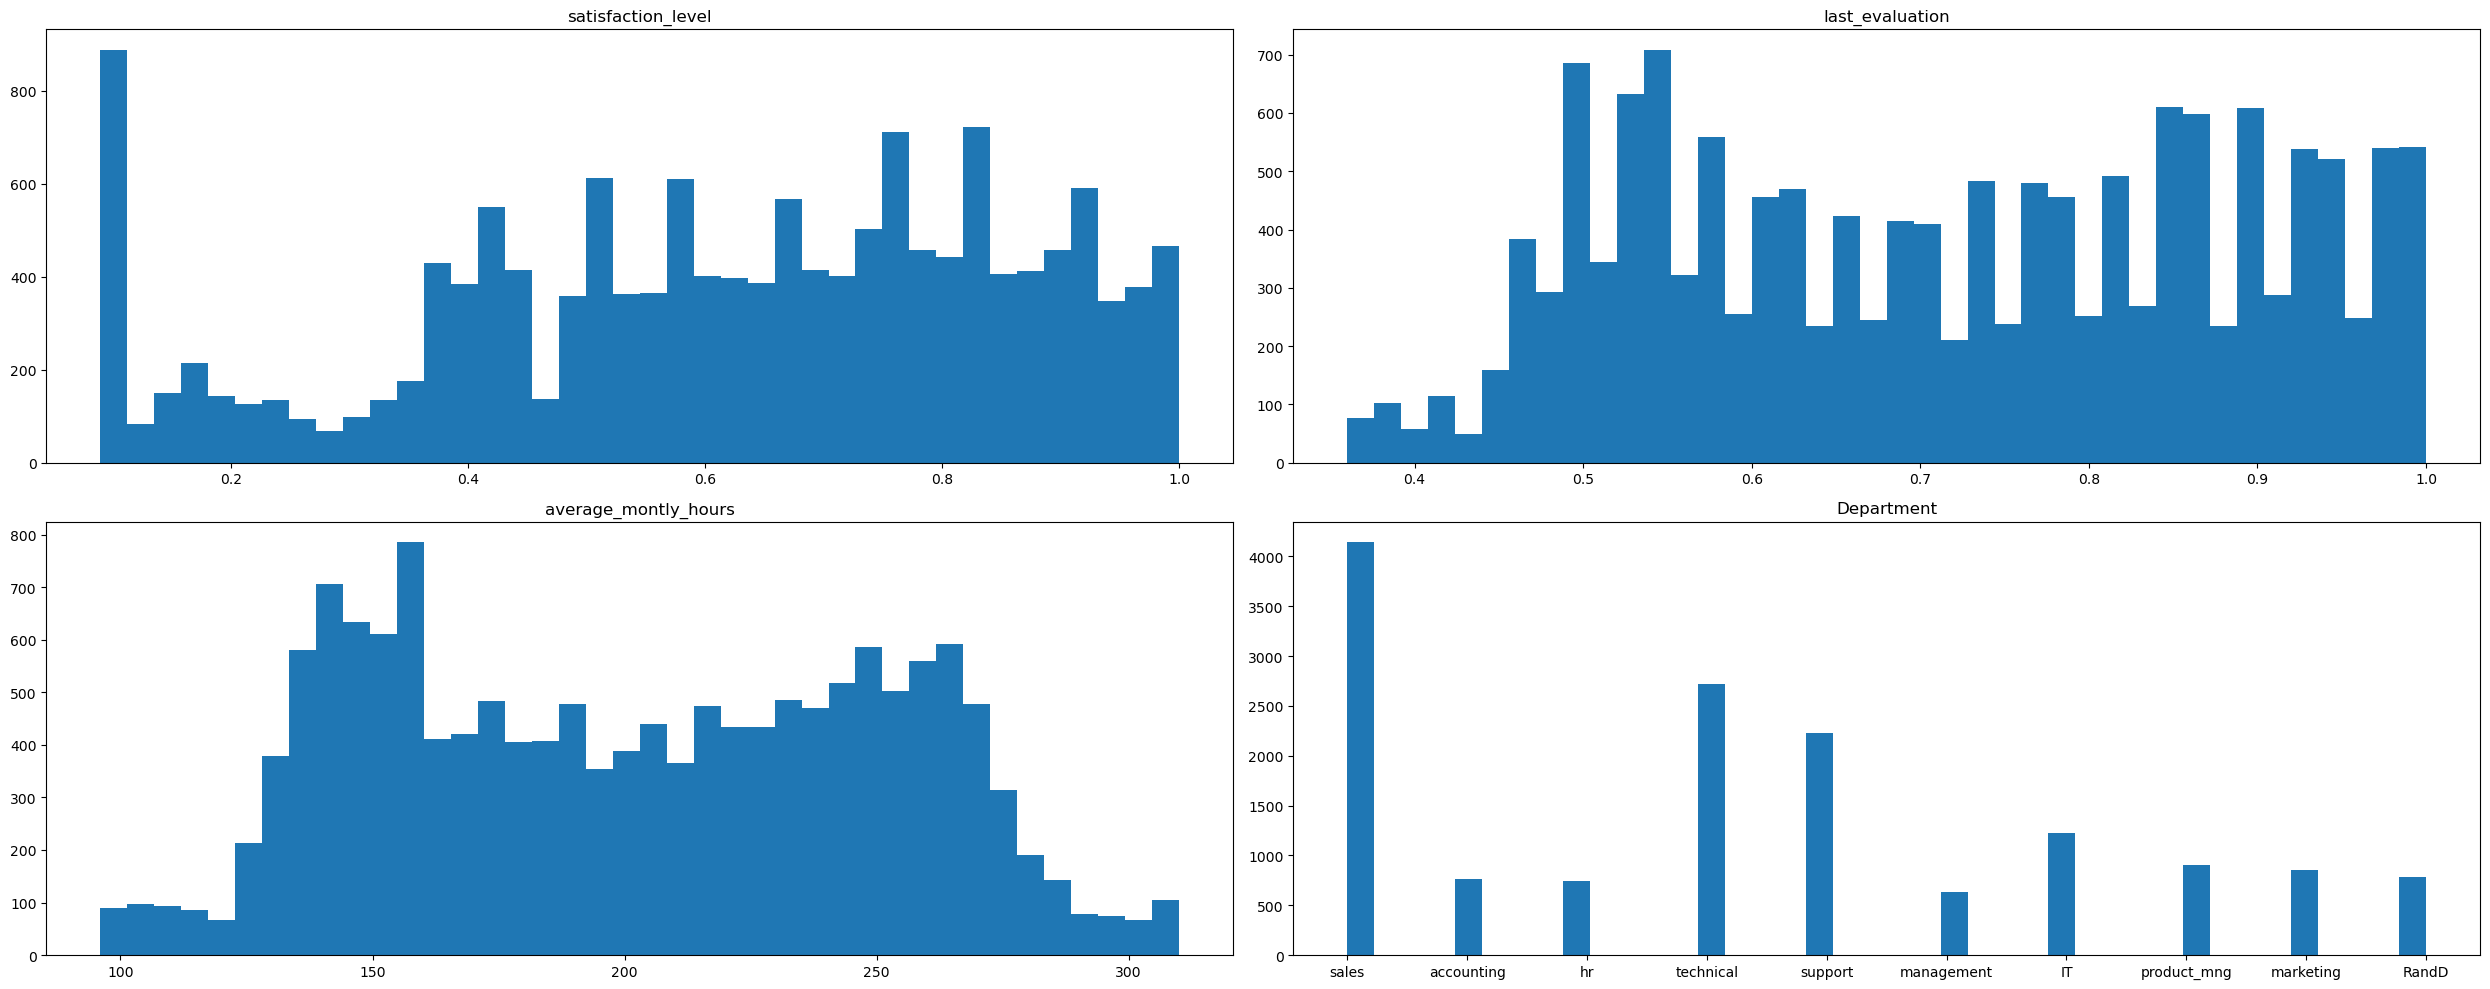

In [29]:
numeric_cols=num
num_col=2
bins=40
num_rows=int(len(numeric_cols)/num_col)
fig,axs=plt.subplots(num_rows,num_col,tight_layout=True,figsize=(25,10))
for col,ax in zip(numeric_cols,axs.flatten()[:len(numeric_cols)]):
    ax.hist(df[col],bins=bins)
    ax.set_title(col)
                 
                  